In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.shape

(10000, 14)

In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x = data[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']        

In [7]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

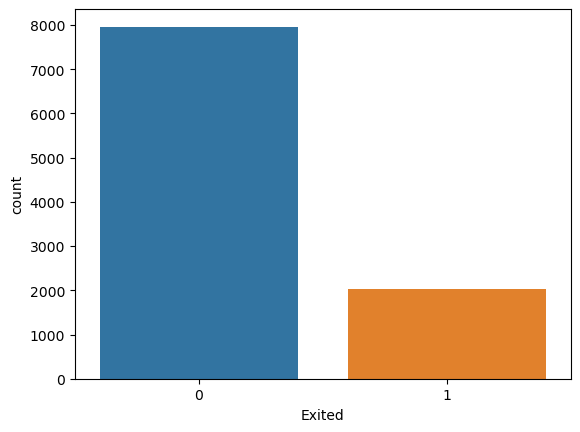

In [9]:
sns.countplot(x=y)

In [10]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
!pip install imbalanced-learn
# to balance the dataset but giving the error

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_res , y_res = ros.fit_resample(x,y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\RoG STRIX\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
#normalize
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaling the dataset
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

In [ ]:
#Cross -validation
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,random_state = 0)

In [ ]:
x.shape

In [1]:
from sklearn.neural_network import MLPClassifier
#MLPClassifier -> multi layer perceptron

In [ ]:
MLPClassifier

In [ ]:
ann = MLPClassifier(hidden_layer_sizes = (100,100,100),random_state = 0
                   ,max_iter = 100 , activation = 'relu')
# hidden_layer_size  , activation fn

In [ ]:
ann.fit(x_train , y_train)

In [ ]:
y_pred = ann.predict(x_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_test.value_counts()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [ ]:
accuracy_score(y_test , y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

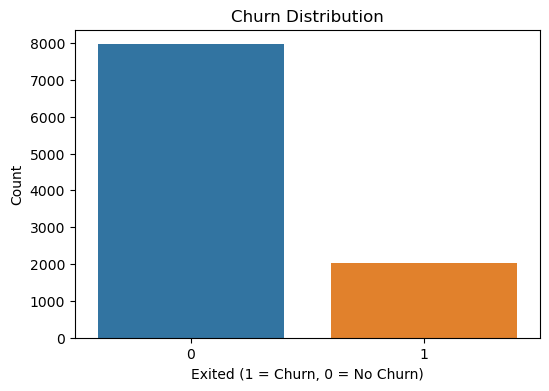

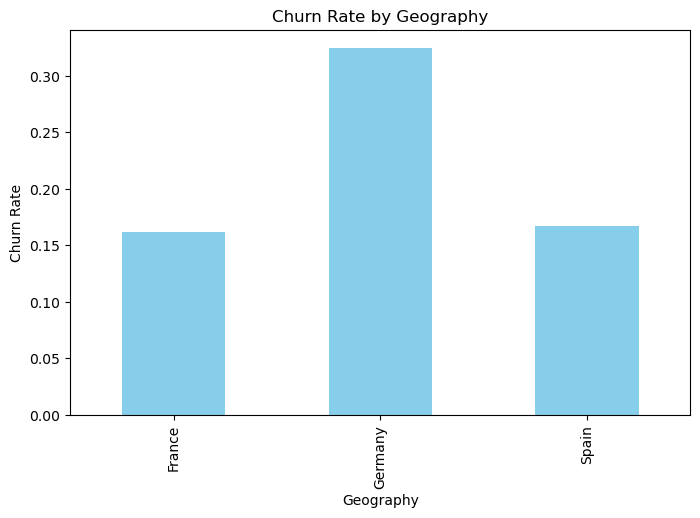

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Display basic information and preview of the data
print(df.info())
print(df.head())

# Visualization of Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited (1 = Churn, 0 = No Churn)')
plt.ylabel('Count')
plt.show()

# Geographic Distribution of Churn
geography_churn_rates = df.groupby('Geography')['Exited'].mean()
plt.figure(figsize=(8, 5))
geography_churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

# Preprocess the data
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Define the feature matrix (X) and target vector (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [18]:

# Build a Neural Network Model
model = Sequential([
    Flatten(input_shape=(x_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Model Evaluation on Test Set
# Evaluate the model and print the test accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/100


C:\Users\RoG STRIX\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6015 - loss: 0.6928 - val_accuracy: 0.7788 - val_loss: 0.5150
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7815 - loss: 0.5018 - val_accuracy: 0.7981 - val_loss: 0.4626
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - loss: 0.4440 - val_accuracy: 0.8062 - val_loss: 0.4427
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8242 - loss: 0.4161 - val_accuracy: 0.8081 - val_loss: 0.4307
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8236 - loss: 0.4146 - val_accuracy: 0.8144 - val_loss: 0.4212
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.3997 - val_accuracy: 0.8219 - val_loss: 0.4124
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8424 - loss: 0.3880 - val_accuracy: 0.8313 - val_loss: 0.4035
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8484 - loss: 0.3753 - val_accuracy: 0.8350

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8577 - loss: 0.3328
Test Accuracy: 0.8610
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8610
Precision: 0.7244
Recall: 0.5062
F1 Score: 0.5959


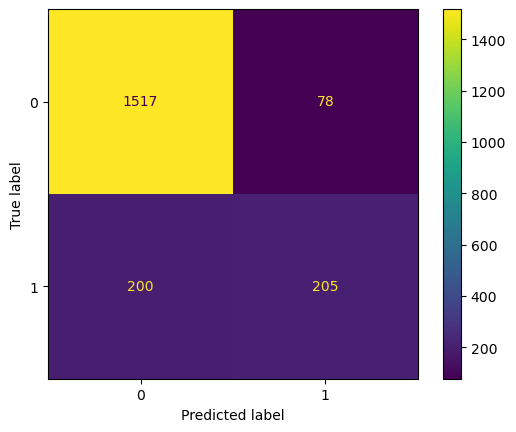

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [24]:
y_pred.shape
import pandas as pd
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Predicted  2000 non-null   int32
dtypes: int32(1)
memory usage: 7.9 KB


In [25]:
import numpy as np

# Show unique values in y_pred
unique_values = np.unique(y_pred)
print("Distinct values in y_pred:", unique_values)


Distinct values in y_pred: [0 1]


In [1]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Dense,Flatten

In [4]:
model=Sequential()

In [7]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'],)

In [ ]:
model.fit